In [1]:
# Get the df from before
%run mass_df.ipynb

Now you have the file massround.mas20.txt in the pd.DataFrame() -> df


In [2]:
df.loc[(df["Z"] == 8) & (df["A"] == 16)]

,N,Z,A,El,Orig,Mass Excess (keV),ME Unc,Binding Energy/A (keV),BE/A Unc,Beta-decay Type,Beta-decay Energy (keV),BE Unc,N Protons,Atomic Mass (micro-u),AM Unc
75,8,8,16,O,,-4737.00217,0.00030,7976.207,a,,*,,15,994914.6193,0.0003


# a

In [3]:
M_O = float(df.loc[(df["Z"] == 8) & (df["A"] == 16), "Binding Energy/A (keV)"].values[0]) * 16
M_Ne = float(df.loc[(df["Z"] == 10) & (df["A"] == 20), "Binding Energy/A (keV)"].values[0]) * 20
M_alpha = float(df.loc[(df["Z"] == 2) & (df["A"] == 4), "Binding Energy/A (keV)"].values[0]) * 4

Z_value = M_Ne - M_O - M_alpha
Z_value / 1000 # MeV

4.729844000000001

In [4]:
kilde = "Mass Excess (keV)"

M_O = float(df.loc[(df["Z"] == 8) & (df["A"] == 16), kilde].values[0])
M_Ne = float(df.loc[(df["Z"] == 10) & (df["A"] == 20), kilde].values[0])
M_alpha = float(df.loc[(df["Z"] == 2) & (df["A"] == 4), kilde].values[0])

Z_value = M_Ne - M_O - M_alpha
Z_value / 1000  # MeV

-4.7298459

# b

In [5]:
float(df.loc[(df["Z"] == 8) & (df["A"] == 16), "Binding Energy/A (keV)"])/ 1000  # MeV

7.9762070000000005

In [18]:
import numpy as np 

# Part with f

E_cm = [1, 3, 5]  # MeV
m_e = 0.511  # MeV / c^2

Q_EC = 13.893 #  MeV
E_alpha_min = 4.7298459 # MeV

for i, Ecm in enumerate(E_cm):

    E_plus = Q_EC - E_alpha_min - Ecm - m_e

    Ee = E_plus / m_e

    f = Ee**5 / 30

    print(f"f({round(Ee,2)} MeV) = ", round(f, 2))

f(14.97 MeV) =  25101.1
f(11.06 MeV) =  5518.79
f(7.15 MeV) =  621.61


In [10]:
# part with alpha penetrability 
from astropy import constants as c
from astropy import units as u
import numpy as np

E_cm = [1, 3, 5]  # eV

R_a = 1.4e-15 * 4 **(1/3) * u.m
R_o = 1.4e-15 * 16 **(1/3) * u.m
R_tot = (R_a + R_o) / 1.1


hbar = c.hbar

z = 4
Z = 16
fine = 1/137


m1 = 4 * u.u
m2 = 16 * u.u

reduced_m = m1 * m2 / (m1 + m2) 

l = 2

for i, Ecm in enumerate(E_cm):
    Energy = Ecm * u.electronvolt * 1e6
    
    beta = np.sqrt(2 * Energy / reduced_m)

    n = z * Z * fine / beta 
    
    k = np.sqrt(2 * reduced_m * Energy) / hbar 
    print(k)
    print(n * k * R_tot)
    
    gamma = 2 * np.pi * n - np.sqrt(32 * n * k * R_tot)
    
    delta_gamma = l * (l + 1) * np.sqrt(2 / (n * k * R_tot))
    
    v_0 = np.exp(-gamma)
    v_2 = v_0 * np.exp(-delta_gamma)
    
    print(Ecm, v_2 * k * R_tot, v_2, v_0)




2.398909287924421e+37 eV(1/2) u(1/2) / (J s)
7.410013321717078e+19 m u / (J s)


UnitConversionError: Can only apply 'subtract' function to quantities with compatible dimensions

In [143]:
# part with alpha penetrability 
from astropy import constants as c
from astropy import units as u

z = 4
Z = 16
fine = 1/137

R_a = 1.4 * 4 **(1/3)
R_o = 1.4 * 16 **(1/3)

m1 = 4 * 931.49 
m2 = 16 * 931.5

E_cm = np.array([1, 3, 5])  # MeV

R_tot = (R_a + R_o) / 1.01  # m

hbar = 197.327  #MeV⋅fm

reduced_m = 473.39 #m1 * m2 / (m1 + m2) # 473.39 MeV / c^2

l = 2

for i, Ecm in enumerate(E_cm):
    
    beta = np.sqrt(2 * Ecm / reduced_m)
    n = z * Z * fine / beta 
    
    k = np.sqrt(2 * reduced_m * Ecm) / hbar
    
    gamma = 2 * np.pi * n - np.sqrt(32 * n * k * R_tot)
    
    delta_gamma = l * (l + 1) * np.sqrt(2 / (n * k * R_tot))
    
    v_0 = np.exp(-gamma)
    v_2 = v_0 * np.exp(-delta_gamma)
    
    print(f"α({Ecm} MeV) =" , "{:.2e}".format(v_2 * k * R_tot))

α(1 MeV) = 1.21e-15
α(3 MeV) = 4.08e-07
α(5 MeV) = 1.88e-04


In [133]:
reduced_m

2980.774399945035

# c

In [169]:
def tot_cross(E, A5, E5, T5, A7, E7, T7):
    sigma5 = A5 / (E - E5 + 1/2*T5)
    sigma7 = A7 / (E - E7 + 1/2*T7)
    return (sigma5 + sigma7)**2


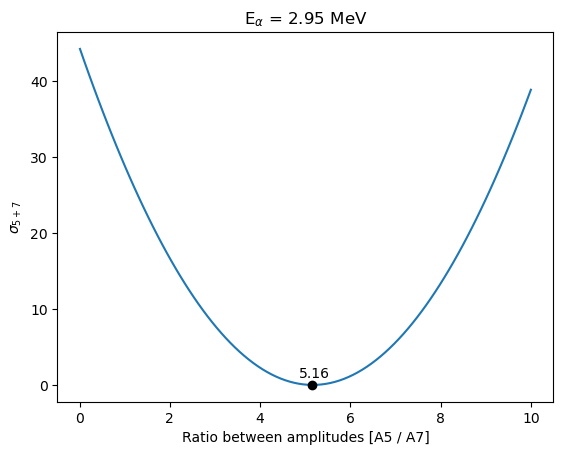

5.156363636363636

In [208]:
ratios = np.linspace(0.01, 10, 100)

# All in MeV
E5 = 2.2
T5 = 0.05
E7 = 3.3
T7 = 0.4
E_picked = 2.95 

to_cros = [tot_cross(E_picked, ratio, E5, T5, 1, E7, T7) for ratio in ratios]

plt.xlabel(r"Ratio between amplitudes [A5 / A7]")
plt.title(r"E$_\alpha$ = 2.95 MeV")
plt.ylabel(r"$\sigma_{ 5+7} $")
plt.plot(ratios, to_cros)
plt.scatter(lowest_cross, min(to_cros), color="black", zorder=20)
plt.annotate(round(lowest_cross, 2), [lowest_cross - 0.3, min(to_cros) + 1])
plt.show()
lowest_cross = ratios[to_cros.index(min(to_cros))]
lowest_cross

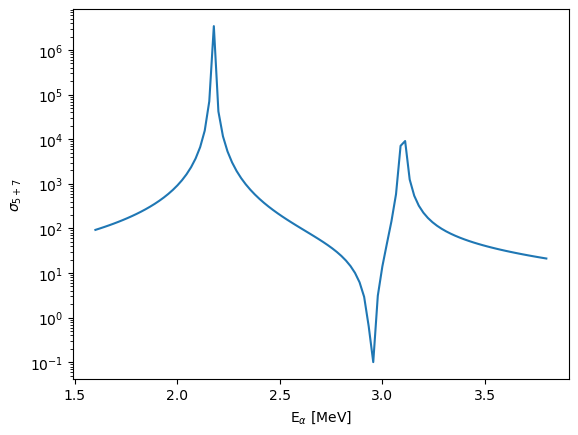

In [185]:
energies = np.linspace(1.6, 3.8, 100)

# All in MeV
A7 = 1
A5 = lowest_cross 

to_cros = [tot_cross(E, A5, E5, T5, A7, E7, T7) for E in energies]

plt.plot(energies, to_cros)
plt.xlabel(r"E$_\alpha$ [MeV]")
plt.ylabel(r"$\sigma_{ 5+7} $")

plt.yscale("log")
plt.show()


# d

In [52]:
m1 * m2 / (m1 + m2) / 1e6

2980.768

In [157]:
c.k_B.value * 6.242e12

8.618011058e-11

In [167]:


z = 4
Z = 16
fine = 1/137

m1 = 16 * 931.49e6 # Mev/c^2
m2 = 4 * 931.49e6 # Mev/c^2

reduced_m = 473.39  # m1 * m2 / (m1 + m2)  # Mev/c^2

E_G = 2 * (np.pi * z * Z * fine)**2 * reduced_m * c.c.value 
k_b = 8.617333262e-5 * 1e-6 # Mev / K
T = 1e8  # K

E_0 = (E_G * k_b**2 * T**2/4)**(1/3) 
E_0, E_G / 1000

(224.72844216803637, 611347776.769717)

In [168]:
4/np.sqrt(3) * np.sqrt(E_0 * k_b * T)

3.213770271492816